In [1]:
import numpy as np
import matplotlib.pyplot as plt
import stablab

In [2]:
# Profile equations
from isentropic import profile_ode, profile_jacobian

# Evans ODE equations
from isentropic import A, Ak

In [3]:
# parameters
p = stablab.Struct()
p.gamma = 5.0/3
p.vp = 0.1

# dependent parameters
p.a = -(1-p.vp)/(1-p.vp**(-p.gamma))

In [4]:
# Structure values
s = stablab.Struct()
s.n = 1 # this is the dimension of the profile ode
# we divide the domain in half to deal with the
# non-uniqueness caused by translational invariance
# s.side = 1 means we are solving the profile on the interval [0,X]
s.side = 1
s.L = -15
s.R = 15
s.F = profile_ode # profile_ode is the profile ode
s.Flinear = profile_jacobian # profile_jacobian is the profile ode Jacobian
s.UL = np.array([1]) # These are the endstates of the profile at x = -infty
s.UR = np.array([p.vp]) # These are the endstates of the profile at x = +infty
s.phase = 0.5*(s.UL+s.UR) # this is the phase condition for the profile at x = 0
s.order = [0] # this indicates to which componenet the phase conditions is applied
s.stats = 'on' # this prints data and plots the profile as it is solved

Profile boundary error:  4.284159812462107e-07
Profile boundary error:  5.166406820134029e-07
Profile boundary error:  4.935801946048812e-07
Profile boundary error:  4.4647455088586696e-07


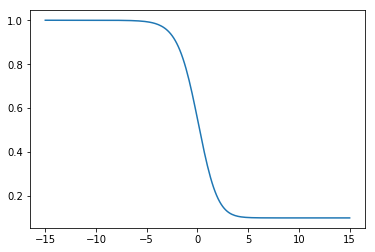

In [5]:
# solve profile for first time
p,s = stablab.profile_flux(p,s)

# plot the profile
x = np.linspace(s.L,s.R,200)
y = stablab.soln(x,s)
plt.plot(x,y.real)
plt.show()

In [6]:
# This choice solves the right hand side via exterior products
s.A = A
s.Ak = Ak
#s,e,m,c = stablab.emcset(s, 'front', [1,2], 'reg_adj_compound', A, Ak)
s,e,m,c = stablab.emcset(s, 'front', [1,2], 'reg_reg_polar', A)
#s,e,m,c = emcset(s,'front',[1,2],'reg_adj_polar')

In [7]:
# display a waitbar
c.stats = 'print' # 'on', 'print', or 'off'
c.ksteps = 2**6

In [8]:
# Preimage Contour
# This is a semi circle. You can also do a semi annulus or a rectangle
circpnts = 30
imagpnts = 10
R = 10
spread = 2
zerodist = 10**(-2)
preimage = stablab.semicirc(circpnts,imagpnts,c.ksteps,R,spread,zerodist)

In [9]:
# compute Evans function
halfw, domain = stablab.Evans_compute(preimage,c,s,p,m,e)

# Normalize the solution
w = halfw / halfw[0]
# Reflect the solution across the imaginary axis
w = stablab.reflect_image(w)

Finding the kato basis


In [10]:
# process and display data
wnd = stablab.winding_number(w) # determine the number of roots inside the contour
print('Winding Number: {:f}\n'.format(wnd))

Winding Number: 0.000000



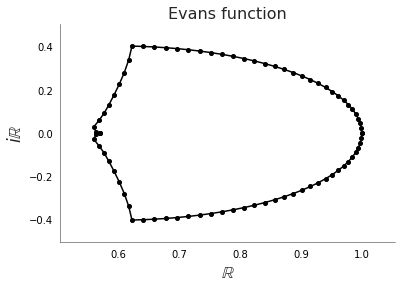

In [11]:
# plot the Evans function (normalized)
stablab.Evans_plot(w)